In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, Birch, AffinityPropagation, MeanShift
from sklearn.metrics.pairwise import cosine_similarity
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import spotipy.util as util
import json, os
import config
from textblob import TextBlob

In [2]:
plt.rcParams.update({'font.size': 15.0})

In [3]:
os.environ['SPOTIPY_CLIENT_ID']= config.CLIENT_ID
os.environ['SPOTIPY_CLIENT_SECRET']= config.CLIENT_SECRET
os.environ['SPOTIPY_REDIRECT_URI']='http://localhost:8081/callback'

In [233]:
username = config.USERNAME
scope = 'user-top-read'
token = util.prompt_for_user_token(username,scope)
sp = spotipy.Spotify(auth=token)

In [7]:
tracks = []
for j in range(1960,2023):
    for i in range(0,1000,50):
        try:
            results = sp.search(q='year:'+str(j), type='track', limit=50,offset=i) 
            tracks.extend(results['tracks']['items'])
        except:
            token = util.prompt_for_user_token(username,scope)
            sp = spotipy.Spotify(auth=token)

In [8]:
df_tracks = pd.DataFrame(tracks)
df_tracks['release_date'] = df_tracks['album'].apply(lambda x: x['release_date'])
df_tracks.head()

album  \
0  {'album_type': 'album', 'artists': [{'external...   
1  {'album_type': 'album', 'artists': [{'external...   
2  {'album_type': 'album', 'artists': [{'external...   
3  {'album_type': 'album', 'artists': [{'external...   
4  {'album_type': 'compilation', 'artists': [{'ex...   

                                             artists  \
0  [{'external_urls': {'spotify': 'https://open.s...   
1  [{'external_urls': {'spotify': 'https://open.s...   
2  [{'external_urls': {'spotify': 'https://open.s...   
3  [{'external_urls': {'spotify': 'https://open.s...   
4  [{'external_urls': {'spotify': 'https://open.s...   

                                   available_markets  disc_number  \
0                                               [IN]            1   
1  [AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...            1   
2                                               [IN]            1   
3                                               [IN]            1   
4                                               [IN]            1   

   duration_ms  explicit              external_ids  \
0       223506     False  {'isrc': 'INH109238940'}   
1       179693     False  {'isrc': 'USMC16046323'}   
2       315613     False  {'isrc': 'INH109832520'}   
3       280080     False  {'isrc': 'INH109350700'}   
4       163360     False  {'isrc': 'INH100305220'}   

                                       external_urls  \
0  {'spotify': 'https://open.spotify.com/track/4n...   
1  {'spotify': 'https://open.spotify.com/track/4H...   
2  {'spotify': 'https://open.spotify.com/track/6R...   
3  {'spotify': 'https://open.spotify.com/track/4j...   
4  {'spotify': 'https://open.spotify.com/track/7p...   

                                                href                      id  \
0  https://api.spotify.com/v1/tracks/4nEKA1qrppgD...  4nEKA1qrppgDexxV25EvKs   
1  https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...  4Hhv2vrOTy89HFRcjU3QOx   
2  https://api.spotify.com/v1/tracks/6Rl4eDKFpvnt...  6Rl4eDKFpvntiRKtPn8d5V   
3  https://api.spotify.com/v1/tracks/4jDfPSa6zoZ4...  4jDfPSa6zoZ4xGTSmyrg8i   
4  https://api.spotify.com/v1/tracks/7pCiEvG73gNj...  7pCiEvG73gNjyq6UdIUDYE   

   is_local                            name  popularity  \
0     False           Chaudhvin Ka Chand Ho          39   
1     False                         At Last          75   
2     False             Ajib Dastan Hai Yeh          53   
3     False  Khoya Khoya Chand Khula Aasman          31   
4     False                         Dolayam          31   

                                         preview_url  track_number   type  \
0  https://p.scdn.co/mp3-preview/27570b0b2d10f42e...             1  track   
1  https://p.scdn.co/mp3-preview/ad80364f22bde644...             7  track   
2  https://p.scdn.co/mp3-preview/90ee4e23e3641948...             7  track   
3  https://p.scdn.co/mp3-preview/e83541429168e45b...             8  track   
4  https://p.scdn.co/mp3-preview/9d7730f47a358f24...             5  track   

                                    uri release_date  
0  spotify:track:4nEKA1qrppgDexxV25EvKs   1960-01-01  
1  spotify:track:4Hhv2vrOTy89HFRcjU3QOx         1960  
2  spotify:track:6Rl4eDKFpvntiRKtPn8d5V   1960-01-01  
3  spotify:track:4jDfPSa6zoZ4xGTSmyrg8i   1960-01-01  
4  spotify:track:7pCiEvG73gNjyq6UdIUDYE   1960-04-08

In [61]:
df_audio_features = pd.DataFrame(columns=list(sp.audio_features(df_tracks['id'].values[:1])[0].keys()))
for i in range(0,len(df_tracks),100):
    try:
        df_audio_features = pd.concat([df_audio_features,pd.DataFrame(sp.audio_features(df_tracks.loc[i:i+99,'id'].values))],ignore_index=True)
    except:
        pass

In [62]:
df_audio_features

danceability  energy key  loudness mode  speechiness  acousticness  \
0             0.274   0.348   5    -8.631    1       0.0293         0.547   
1             0.524   0.280   7    -7.078    1       0.0289         0.899   
2             0.397   0.560   0    -7.536    1       0.1260         0.898   
3             0.454   0.388   1   -17.274    1       0.0455         0.919   
4             0.542   0.280   2   -14.974    1       0.0367         0.980   
...             ...     ...  ..       ...  ...          ...           ...   
52795         0.696   0.401   2   -10.822    1       0.0469         0.311   
52796         0.884   0.481   3    -9.328    0       0.0593         0.127   
52797         0.589   0.768  11    -7.164    0       0.0662         0.648   
52798         0.795   0.603   4    -7.446    1       0.0315         0.407   
52799         0.449   0.611   0    -4.698    1       0.0720         0.836   

       instrumentalness  liveness  valence    tempo            type  \
0              0.013300    0.3340    0.328   87.430  audio_features   
1              0.000000    0.1440    0.525   97.691  audio_features   
2              0.000003    0.6030    0.697  171.294  audio_features   
3              0.001060    0.0806    0.672  112.476  audio_features   
4              0.588000    0.1130    0.711  115.920  audio_features   
...                 ...       ...      ...      ...             ...   
52795          0.005210    0.0463    0.944   96.475  audio_features   
52796          0.221000    0.0682    0.898  141.495  audio_features   
52797          0.000000    0.0823    0.810  152.006  audio_features   
52798          0.007310    0.0898    0.938  102.040  audio_features   
52799          0.000000    0.9160    0.422   76.233  audio_features   

                           id                                   uri  \
0      4Hhv2vrOTy89HFRcjU3QOx  spotify:track:4Hhv2vrOTy89HFRcjU3QOx   
1      4nEKA1qrppgDexxV25EvKs  spotify:track:4nEKA1qrppgDexxV25EvKs   
2      7pCiEvG73gNjyq6UdIUDYE  spotify:track:7pCiEvG73gNjyq6UdIUDYE   
3      1xjO1qiSWdRoK4TXIR6PeJ  spotify:track:1xjO1qiSWdRoK4TXIR6PeJ   
4      5o4crBlWt8lQnLMfPmkzQS  spotify:track:5o4crBlWt8lQnLMfPmkzQS   
...                       ...                                   ...   
52795  3V29kIVkcNchC5ydvY0ZyR  spotify:track:3V29kIVkcNchC5ydvY0ZyR   
52796  5WxUaPf2AOxBcJ2nA7awdN  spotify:track:5WxUaPf2AOxBcJ2nA7awdN   
52797  1Ya1UL2b1s4GOHzzfyE5fv  spotify:track:1Ya1UL2b1s4GOHzzfyE5fv   
52798  6MYyzyA2ePAvrELcaA5qHG  spotify:track:6MYyzyA2ePAvrELcaA5qHG   
52799  0rPtmyy3lIE9qYJszSHQl2  spotify:track:0rPtmyy3lIE9qYJszSHQl2   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...   
1      https://api.spotify.com/v1/tracks/4nEKA1qrppgD...   
2      https://api.spotify.com/v1/tracks/7pCiEvG73gNj...   
3      https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...   
4      https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...   
...                                                  ...   
52795  https://api.spotify.com/v1/tracks/3V29kIVkcNch...   
52796  https://api.spotify.com/v1/tracks/5WxUaPf2AOxB...   
52797  https://api.spotify.com/v1/tracks/1Ya1UL2b1s4G...   
52798  https://api.spotify.com/v1/tracks/6MYyzyA2ePAv...   
52799  https://api.spotify.com/v1/tracks/0rPtmyy3lIE9...   

                                            analysis_url duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/4Hhv...      179693   
1      https://api.spotify.com/v1/audio-analysis/4nEK...      223507   
2      https://api.spotify.com/v1/audio-analysis/7pCi...      163360   
3      https://api.spotify.com/v1/audio-analysis/1xjO...      423013   
4      https://api.spotify.com/v1/audio-analysis/5o4c...      169933   
...                                                  ...         ...   
52795  https://api.spotify.com/v1/audio-analysis/3V29...      188944   
52796  https://api.spotify.com/v1/audio-analysis/5WxU...      279261   
52797  

In [67]:
df = df_tracks.merge(df_audio_features,on='id',how='left')
df

album  \
0      {'album_type': 'album', 'artists': [{'external...   
1      {'album_type': 'album', 'artists': [{'external...   
2      {'album_type': 'compilation', 'artists': [{'ex...   
3      {'album_type': 'single', 'artists': [{'externa...   
4      {'album_type': 'single', 'artists': [{'externa...   
...                                                  ...   
52995  {'album_type': 'album', 'artists': [{'external...   
52996  {'album_type': 'compilation', 'artists': [{'ex...   
52997  {'album_type': 'album', 'artists': [{'external...   
52998  {'album_type': 'compilation', 'artists': [{'ex...   
52999  {'album_type': 'album', 'artists': [{'external...   

                                                 artists  \
0      [{'external_urls': {'spotify': 'https://open.s...   
1      [{'external_urls': {'spotify': 'https://open.s...   
2      [{'external_urls': {'spotify': 'https://open.s...   
3      [{'external_urls': {'spotify': 'https://open.s...   
4      [{'external_urls': {'spotify': 'https://open.s...   
...                                                  ...   
52995  [{'external_urls': {'spotify': 'https://open.s...   
52996  [{'external_urls': {'spotify': 'https://open.s...   
52997  [{'external_urls': {'spotify': 'https://open.s...   
52998  [{'external_urls': {'spotify': 'https://open.s...   
52999  [{'external_urls': {'spotify': 'https://open.s...   

                                       available_markets  disc_number  \
0      [AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...            1   
1                                                   [IN]            1   
2                                                   [IN]            1   
3                                                   [IN]            1   
4                                                   [IN]            1   
...                                                  ...          ...   
52995  [AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...            1   
52996  [AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...            1   
52997  [AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...            1   
52998  [AD, AE, AG, AM, AR, AT, AZ, BA, BB, BF, BH, B...            1   
52999  [AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...            1   

       duration_ms_x  explicit              external_ids  \
0             179693     False  {'isrc': 'USMC16046323'}   
1             223506     False  {'isrc': 'INH109238940'}   
2             163360     False  {'isrc': 'INH100305220'}   
3             423013     False  {'isrc': 'INH100407396'}   
4             169933     False  {'isrc': 'INH100367800'}   
...              ...       ...                       ...   
52995         188943     False  {'isrc': 'USJ3V1204541'}   
52996         279261     False  {'isrc': 'MYAG11100357'}   
52997         205640     False  {'isrc': 'TCABH1216565'}   
52998         239826     False  {'isrc': 'MXUM70801300'}   
52999         180640     False  {'isrc': 'BRSME1200540'}   

                                           external_urls  \
0      {'spotify': 'https://open.spotify.com/track/4H...   
1      {'spotify': 'https://open.spotify.com/track/4n...   
2      {'spotify': 'https://open.spotify.com/track/7p...   
3      {'spotify': 'https://open.spotify.com/track/1x...   
4      {'spotify': 'https://open.spotify.com/track/5o...   
...                                                  ...   
52995  {'spotify': 'https://open.spotify.com/track/3V...   
52996  {'spotify': 'https://open.spotify.com/track/5W...   
52997  {'spotify': 'https://open.spotify.com/track/1Y...   
52998  {'spotify': 'https://open.spotify.com/track/6M...   
52999  {'spotify': 'https://open.spotify.com/track/0r...   

                                                    href  \
0      https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...   
1      https://api.spotify.com/v1/tracks/4nEKA1qrppgD...   
2      https://api.spotify.com/v1/tracks/7pCiEvG73gNj...   
3      https://api.spotify.com/v1/tracks/1xjO1qiSW

In [123]:
for i,val in df[df.danceability.isnull()].iterrows():
    try:
        obj = sp.audio_features(df.loc[i,'id'])[0]
        del obj['id']
        df.loc[i,df.columns[len(df_tracks.columns):]] = list(obj.values())
    except:
        pass
df[df.danceability.isnull()]

album  \
9492  {'album_type': 'album', 'artists': [{'external...   

                                                artists  \
9492  [{'external_urls': {'spotify': 'https://open.s...   

                                      available_markets  disc_number  \
9492  [AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...            1   

      duration_ms_x  explicit              external_ids  \
9492         131998     False  {'isrc': 'GX5MX2169095'}   

                                          external_urls  \
9492  {'spotify': 'https://open.spotify.com/track/2P...   

                                                   href  \
9492  https://api.spotify.com/v1/tracks/2PJGgRTVLRGG...   

                          id  ...  instrumentalness liveness  valence tempo  \
9492  2PJGgRTVLRGG2LgrrdtDie  ...               NaN      NaN      NaN   NaN   

      type_y uri_y track_href analysis_url  duration_ms_y  time_signature  
9492     NaN   NaN        NaN          NaN            NaN             NaN  

[1 rows x 35 columns]

In [32]:
df['year'] = df['release_date'].apply(lambda x: int(x.split('-')[0]))
df

album  \
0     {'album_type': 'album', 'artists': [{'external...   
1     {'album_type': 'album', 'artists': [{'external...   
2     {'album_type': 'compilation', 'artists': [{'ex...   
3     {'album_type': 'single', 'artists': [{'externa...   
4     {'album_type': 'single', 'artists': [{'externa...   
...                                                 ...   
9994  {'album_type': 'single', 'artists': [{'externa...   
9995  {'album_type': 'album', 'artists': [{'external...   
9996  {'album_type': 'compilation', 'artists': [{'ex...   
9997  {'album_type': 'single', 'artists': [{'externa...   
9998  {'album_type': 'album', 'artists': [{'external...   

                                                artists  \
0     [{'external_urls': {'spotify': 'https://open.s...   
1     [{'external_urls': {'spotify': 'https://open.s...   
2     [{'external_urls': {'spotify': 'https://open.s...   
3     [{'external_urls': {'spotify': 'https://open.s...   
4     [{'external_urls': {'spotify': 'https://open.s...   
...                                                 ...   
9994  [{'external_urls': {'spotify': 'https://open.s...   
9995  [{'external_urls': {'spotify': 'https://open.s...   
9996  [{'external_urls': {'spotify': 'https://open.s...   
9997  [{'external_urls': {'spotify': 'https://open.s...   
9998  [{'external_urls': {'spotify': 'https://open.s...   

                                      available_markets  disc_number  \
0     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...            1   
1                                                ['IN']            1   
2                                                ['IN']            1   
3                                                ['IN']            1   
4                                                ['IN']            1   
...                                                 ...          ...   
9994  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...            1   
9995  ['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...            1   
9996  ['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...            1   
9997  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...            1   
9998  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...            1   

      duration_ms_x  explicit              external_ids  \
0            179693     False  {'isrc': 'USMC16046323'}   
1            223506     False  {'isrc': 'INH109238940'}   
2            163360     False  {'isrc': 'INH100305220'}   
3            423013     False  {'isrc': 'INH100407396'}   
4            169933     False  {'isrc': 'INH100367800'}   
...             ...       ...                       ...   
9994         193374     False  {'isrc': 'FR2X42203488'}   
9995         185857      True  {'isrc': 'USUM72208020'}   
9996         193506      True  {'isrc': 'USUM72120404'}   
9997         188181      True  {'isrc': 'INUM72200196'}   
9998         165546     False  {'isrc': 'INSD11901127'}   

                                          external_urls  \
0     {'spotify': 'https://open.spotify.com/track/4H...   
1     {'spotify': 'https://open.spotify.com/track/4n...   
2     {'spotify': 'https://open.spotify.com/track/7p...   
3     {'spotify': 'https://open.spotify.com/track/1x...   
4     {'spotify': 'https://open.spotify.com/track/5o...   
...                                                 ...   
9994  {'spotify': 'https://open.spotify.com/track/04...   
9995  {'spotify': 'https://open.spotify.com/track/3Z...   
9996  {'spotify': 'https://open.spotify.com/track/08...   
9997  {'spotify': 'https://open.spotify.com/track/0O...   
9998  {'spotify': 'https://open.spotify.com/track/78...   

                                                   href  \
0     https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...   
1     https://api.spotify.com/v1/tracks/4nEKA1qrppgD...   
2     https://api.spotify.com/v1/tracks/7pCiEvG73gNj...   
3     https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...   
4     https://api.spotify.com/v1/tracks/5o4crBlWt8lQ..

In [33]:
df.isnull().sum()

album                    0
artists                  0
available_markets        0
disc_number              0
duration_ms_x            0
explicit                 0
external_ids             0
external_urls            0
href                     0
id                       0
is_local                 0
name                    11
popularity               0
preview_url              2
track_number             0
type_x                   0
uri_x                    0
release_date             0
danceability             3
energy                   3
key                      3
loudness                 3
mode                     3
speechiness              3
acousticness             3
instrumentalness         3
liveness                 3
valence                  3
tempo                    3
type_y               10000
uri_y                10000
track_href               3
analysis_url             3
duration_ms_y        10000
time_signature           3
type                 53002
uri                  53002
d

In [34]:
df.drop(columns=['type','uri','duration_ms','type_y','uri_y','duration_ms_y'],inplace=True)
df.rename(columns={'type_x':'type','uri_x':'uri','duration_ms_x':'duration_ms'},inplace=True)
df

album  \
0     {'album_type': 'album', 'artists': [{'external...   
1     {'album_type': 'album', 'artists': [{'external...   
2     {'album_type': 'compilation', 'artists': [{'ex...   
3     {'album_type': 'single', 'artists': [{'externa...   
4     {'album_type': 'single', 'artists': [{'externa...   
...                                                 ...   
9994  {'album_type': 'single', 'artists': [{'externa...   
9995  {'album_type': 'album', 'artists': [{'external...   
9996  {'album_type': 'compilation', 'artists': [{'ex...   
9997  {'album_type': 'single', 'artists': [{'externa...   
9998  {'album_type': 'album', 'artists': [{'external...   

                                                artists  \
0     [{'external_urls': {'spotify': 'https://open.s...   
1     [{'external_urls': {'spotify': 'https://open.s...   
2     [{'external_urls': {'spotify': 'https://open.s...   
3     [{'external_urls': {'spotify': 'https://open.s...   
4     [{'external_urls': {'spotify': 'https://open.s...   
...                                                 ...   
9994  [{'external_urls': {'spotify': 'https://open.s...   
9995  [{'external_urls': {'spotify': 'https://open.s...   
9996  [{'external_urls': {'spotify': 'https://open.s...   
9997  [{'external_urls': {'spotify': 'https://open.s...   
9998  [{'external_urls': {'spotify': 'https://open.s...   

                                      available_markets  disc_number  \
0     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...            1   
1                                                ['IN']            1   
2                                                ['IN']            1   
3                                                ['IN']            1   
4                                                ['IN']            1   
...                                                 ...          ...   
9994  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...            1   
9995  ['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...            1   
9996  ['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...            1   
9997  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...            1   
9998  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...            1   

      duration_ms  explicit              external_ids  \
0          179693     False  {'isrc': 'USMC16046323'}   
1          223506     False  {'isrc': 'INH109238940'}   
2          163360     False  {'isrc': 'INH100305220'}   
3          423013     False  {'isrc': 'INH100407396'}   
4          169933     False  {'isrc': 'INH100367800'}   
...           ...       ...                       ...   
9994       193374     False  {'isrc': 'FR2X42203488'}   
9995       185857      True  {'isrc': 'USUM72208020'}   
9996       193506      True  {'isrc': 'USUM72120404'}   
9997       188181      True  {'isrc': 'INUM72200196'}   
9998       165546     False  {'isrc': 'INSD11901127'}   

                                          external_urls  \
0     {'spotify': 'https://open.spotify.com/track/4H...   
1     {'spotify': 'https://open.spotify.com/track/4n...   
2     {'spotify': 'https://open.spotify.com/track/7p...   
3     {'spotify': 'https://open.spotify.com/track/1x...   
4     {'spotify': 'https://open.spotify.com/track/5o...   
...                                                 ...   
9994  {'spotify': 'https://open.spotify.com/track/04...   
9995  {'spotify': 'https://open.spotify.com/track/3Z...   
9996  {'spotify': 'https://open.spotify.com/track/08...   
9997  {'spotify': 'https://open.spotify.com/track/0O...   
9998  {'spotify': 'https://open.spotify.com/track/78...   

                                                   href  \
0     https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...   
1     https://api.spotify.com/v1/tracks/4nEKA1qrppgD...   
2     https://api.spotify.com/v1/tracks/7pCiEvG73gNj...   
3     https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...   
4     https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...   
...                

In [11]:
df.dropna(inplace=True)

In [96]:
df['album_name'] = df['album'].apply(lambda x: x['name'])
df['artists_name'] = df['artists'].apply(lambda x: x[0]['name'] if len(x)==1 else [i['name'] for i in x])
df['no_of_artists'] = df['artists'].apply(lambda x: len(x))
df['no_of_markets'] = df['available_markets'].apply(lambda x: len(x))
df['album_type'] = df['album'].apply(lambda x: x['album_type'])
df['album_total_tracks'] = df['album'].apply(lambda x: x['total_tracks'])

In [16]:
df.to_csv('Spotify_1960_to_2022.csv')

In [11]:
# df = pd.read_csv('Spotify_1960_to_2022.csv',index_col=0)
# import ast
# obj_cols = ['album','artists','available_markets','external_ids','external_urls']
# for i in obj_cols:
#     df[i] = df[i].apply(lambda x: ast.literal_eval(x))

# Analysis

In [12]:
audio_feat_cols = df.columns[18:29]
audio_feat_cols

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [227]:
mean_by_yr = df.groupby(['year'])[[*audio_feat_cols,'popularity']].mean()
mean_by_yr

danceability    energy       key   loudness      mode  speechiness  \
year                                                                       
1960      0.507707  0.389695  5.059059 -12.004199  0.719720     0.074389   
1961      0.500849  0.398111  4.931932 -12.186053  0.713714     0.069084   
1962      0.495651  0.391213  5.263000 -11.975397  0.710000     0.072529   
1963      0.499725  0.392508  5.187000 -12.129115  0.734000     0.059993   
1964      0.493449  0.406681  5.139000 -11.603606  0.702000     0.061081   
...            ...       ...       ...        ...       ...          ...   
2018      0.629339  0.633406  5.276000  -6.819686  0.505000     0.088092   
2019      0.636093  0.629977  5.258000  -6.706410  0.531000     0.090613   
2020      0.655014  0.612785  5.243487  -7.004906  0.501002     0.101477   
2021      0.651236  0.616970  5.447447  -7.260111  0.502503     0.103922   
2022      0.646730  0.635723  5.342026  -6.974256  0.522568     0.090028   

      acousticness  instrumentalness  liveness   valence       tempo  \
year                                                                   
1960      0.785713          0.174164  0.219959  0.612741  113.841166   
1961      0.780294          0.198011  0.225450  0.606733  114.317919   
1962      0.793116          0.167527  0.220645  0.606789  115.944643   
1963      0.793825          0.166369  0.226781  0.621881  115.172024   
1964      0.790348          0.162585  0.229858  0.611342  115.097638   
...            ...               ...       ...       ...         ...   
2018      0.359780          0.024739  0.173364  0.479097  119.639367   
2019      0.362427          0.026119  0.170736  0.500828  118.462496   
2020      0.360895          0.016484  0.170852  0.494139  117.084759   
2021      0.359935          0.024009  0.179971  0.517892  120.222110   
2022      0.286593          0.013750  0.179570  0.519886  118.891438   

      popularity  
year              
1960   21.439439  
1961   21.377377  
1962   23.144000  
1963   25.621000  
1964   25.184000  
...          ...  
2018   59.557000  
2019   59.311000  
2020   59.655311  
2021   61.424424  
2022   32.022066  

[63 rows x 12 columns]

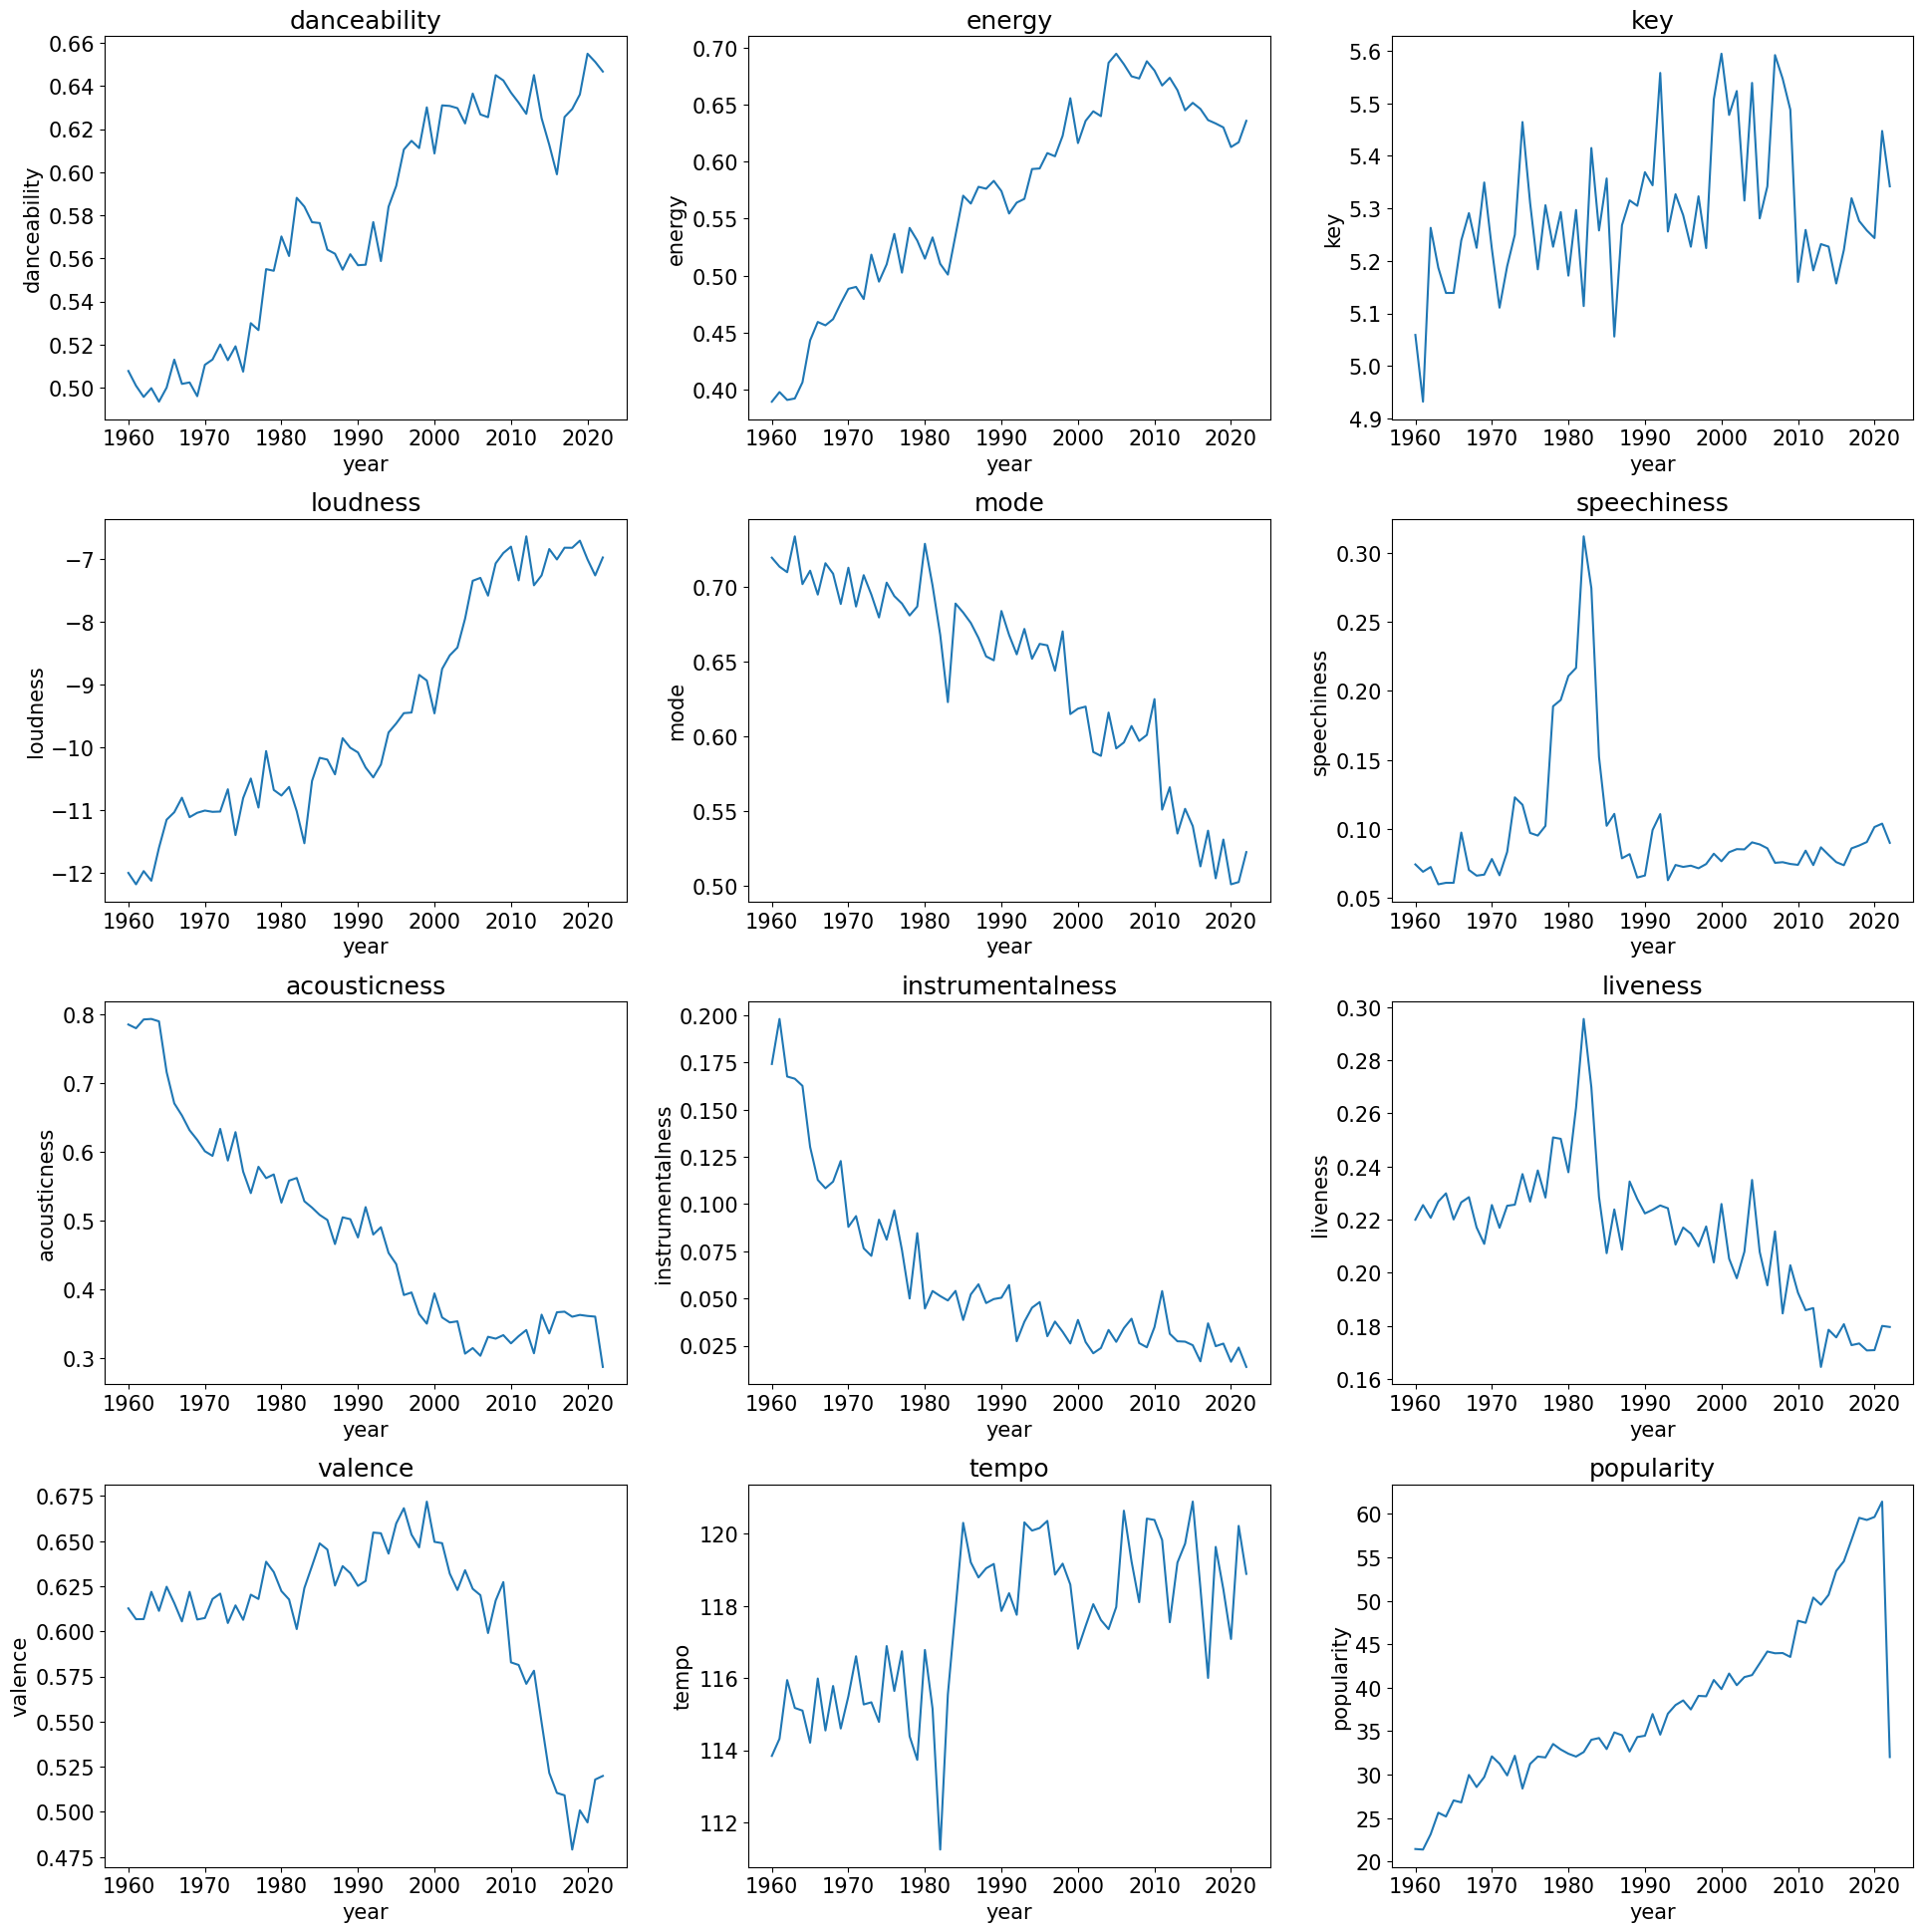

In [372]:
fig, axes = plt.subplots(4,3,figsize=(20,20))
# fig.delaxes(axes[3][2])
fig.tight_layout(pad=3)

for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=mean_by_yr,x='year',y=mean_by_yr.columns[i],ax=ax).set(title=mean_by_yr.columns[i])

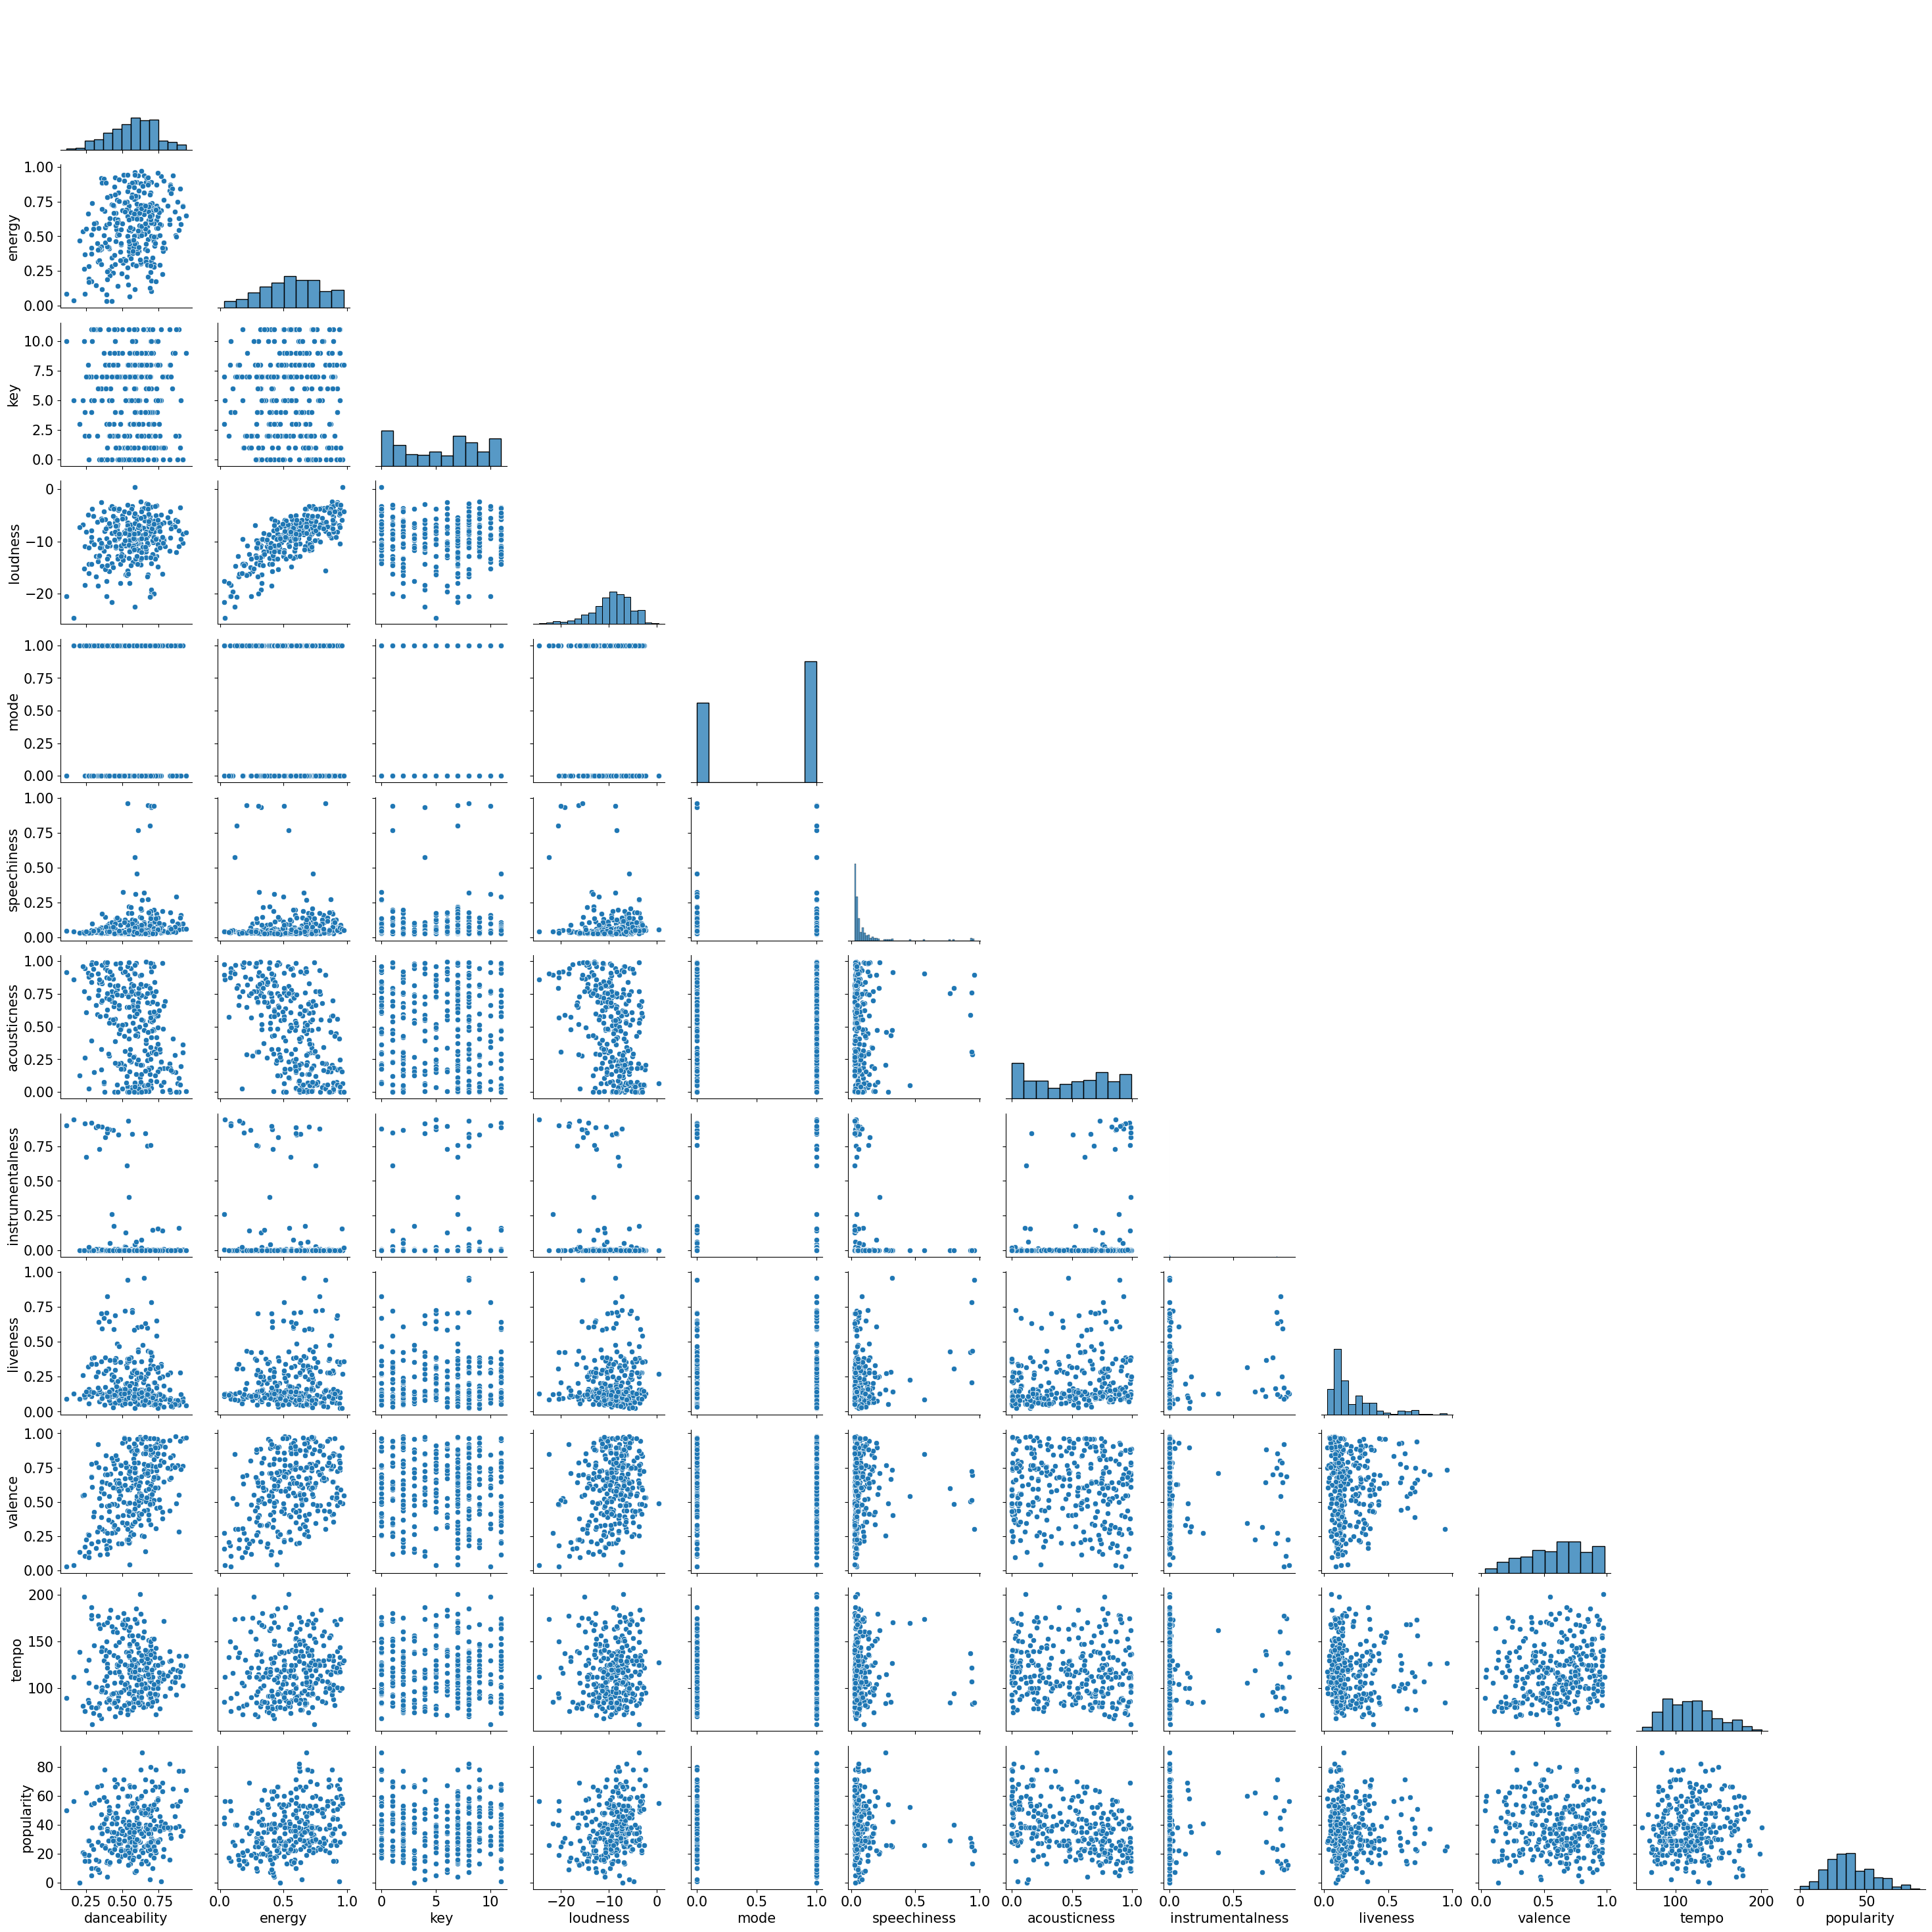

In [375]:
sns.pairplot(data=df[[*audio_feat_cols,'popularity']].sample(300),corner=True)

In [13]:
df.loc[df['year']<1980,'years_window'] = '1960 - 1979'
df.loc[(df['year']>=1980) & (df['year']<2000),'years_window'] = '1980 - 1999'
df.loc[df['year']>=2000,'years_window'] = '2000 - 2022'

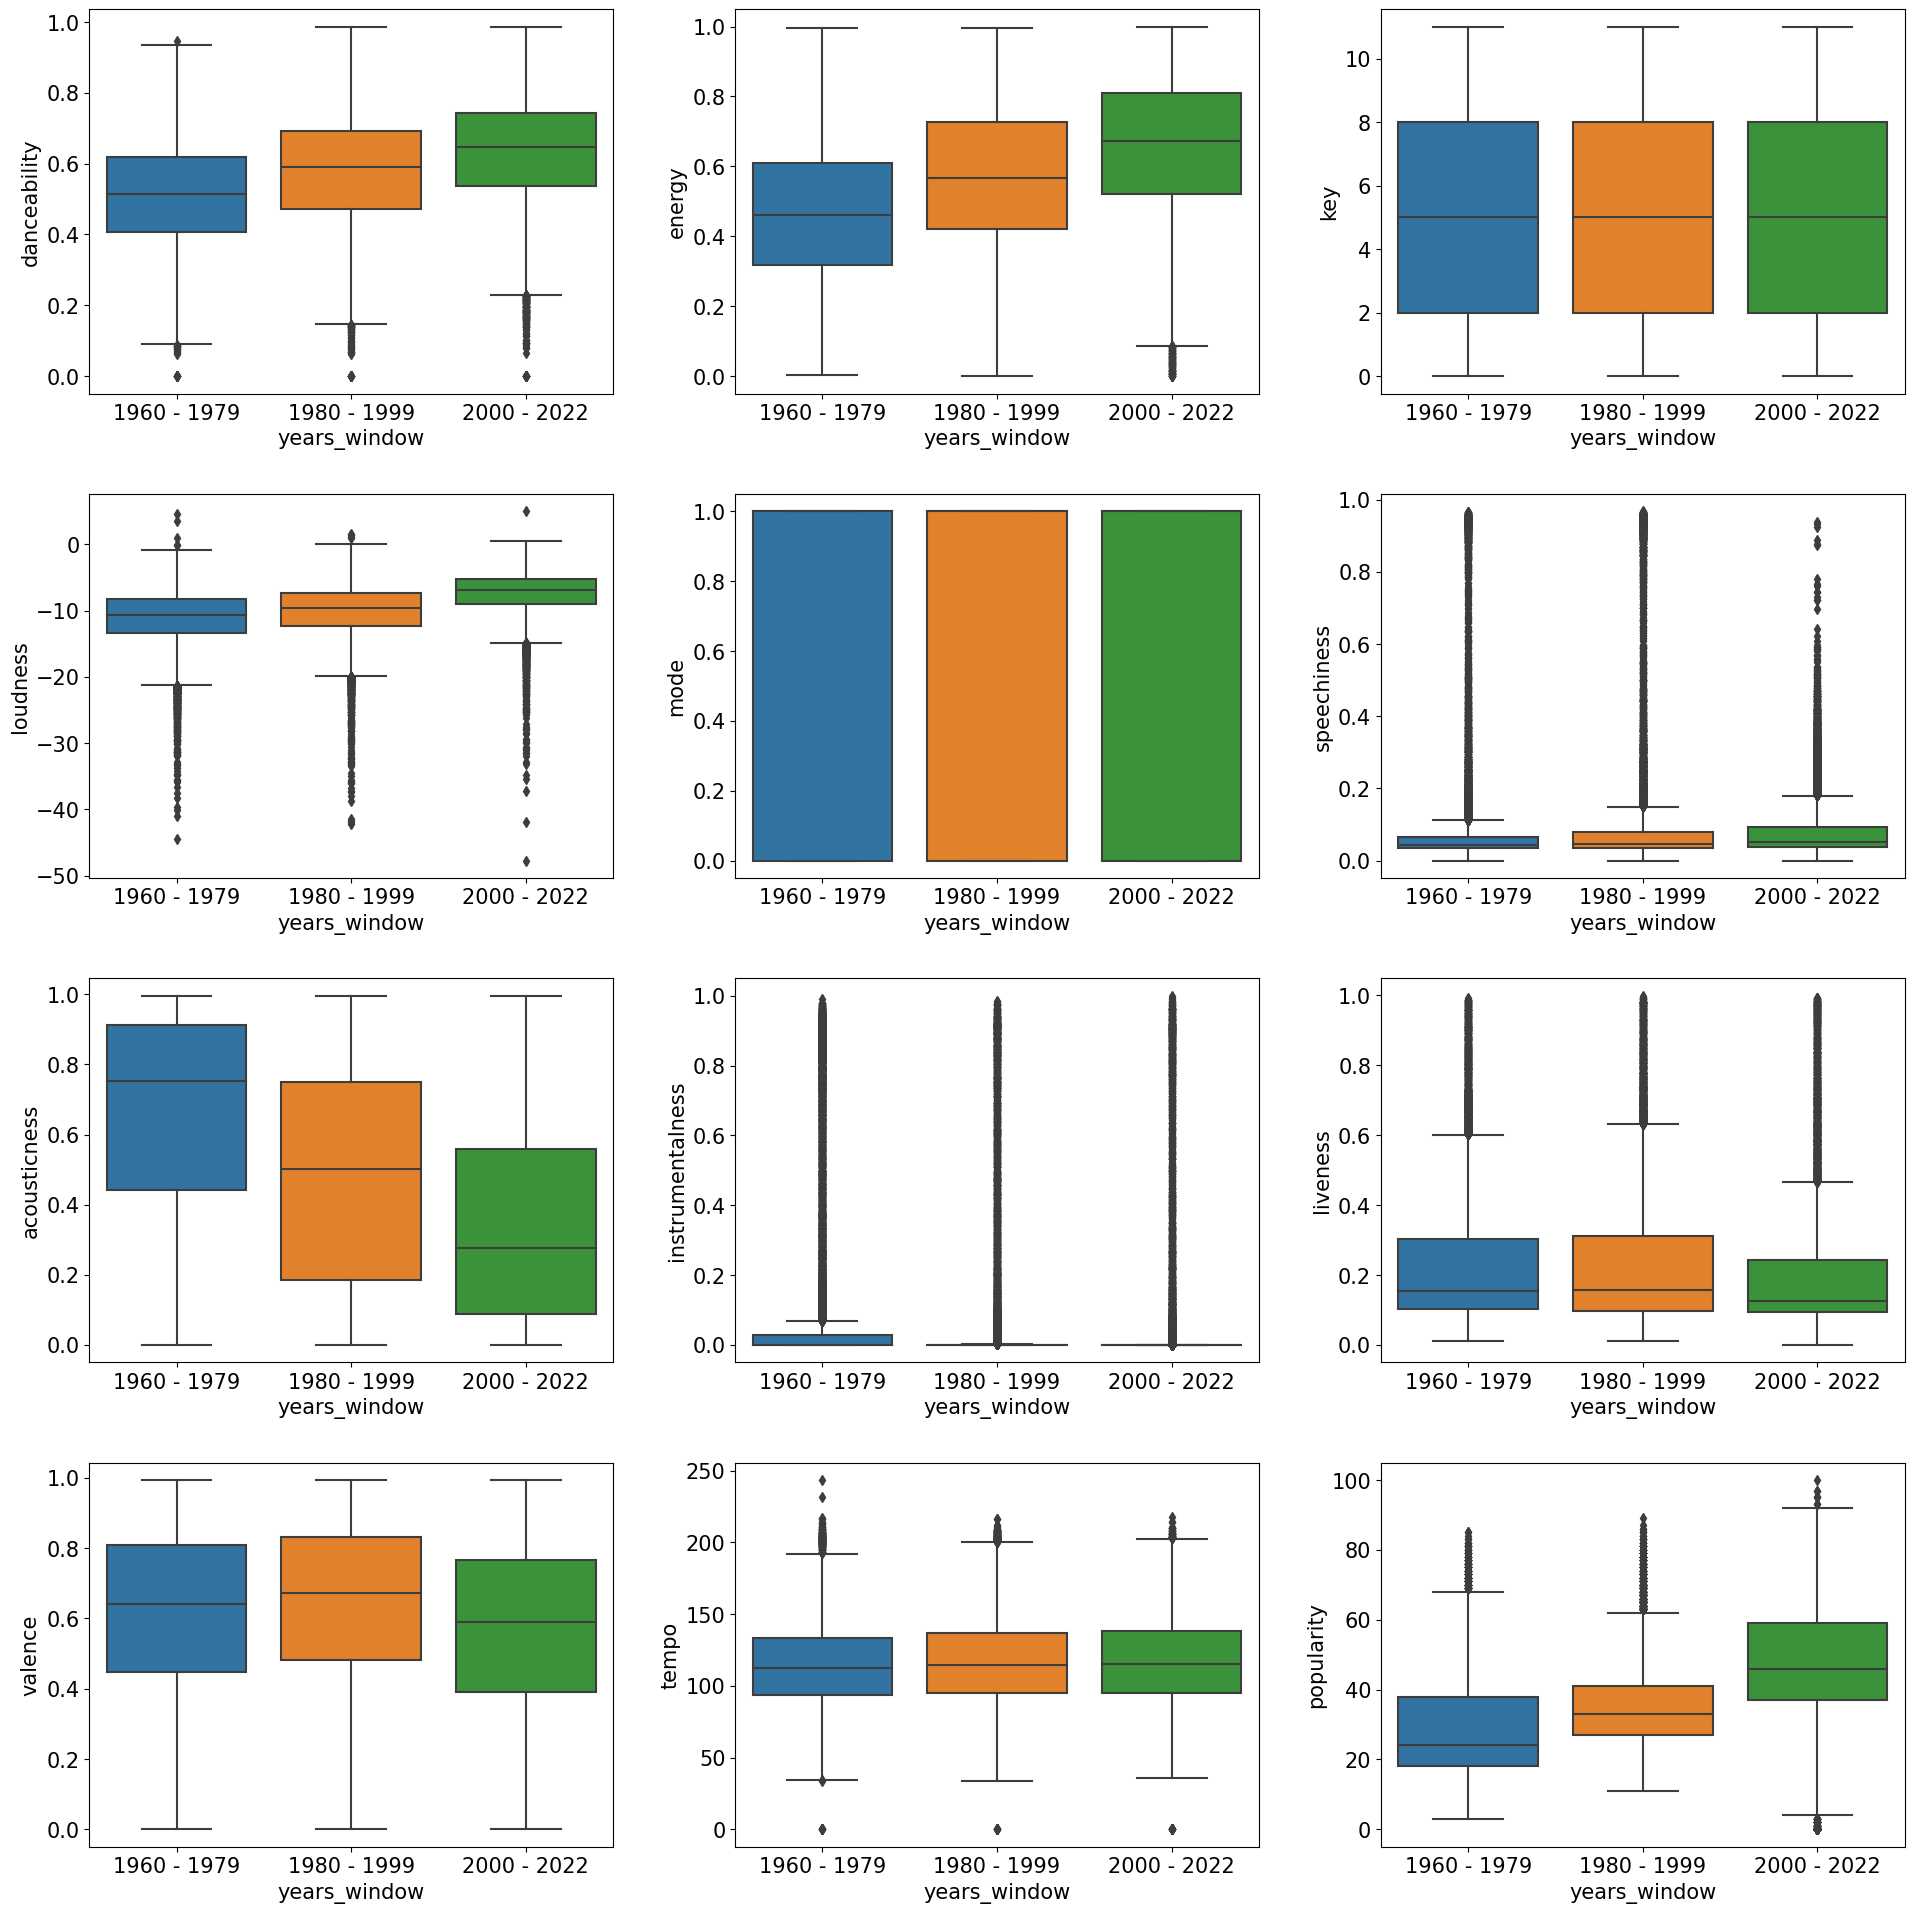

In [14]:
fig, axes = plt.subplots(4,3,figsize=(20,20))
fig.tight_layout(pad=3)

for i, ax in enumerate(axes.ravel()):
    sns.boxplot(data = df , x='years_window',y=[*audio_feat_cols,'popularity'][i],ax=ax)

In [134]:
mean_by_yr['key'] = df.groupby(['year'])['key'].agg(lambda x: int(pd.Series.mode(x)[0]))
mean_by_yr

danceability    energy  key   loudness      mode  speechiness  \
year                                                                  
1960      0.507707  0.389695    0 -12.004199  0.719720     0.074389   
1961      0.500849  0.398111    7 -12.186053  0.713714     0.069084   
1962      0.495651  0.391213    5 -11.975397  0.710000     0.072529   
1963      0.499725  0.392508    0 -12.129115  0.734000     0.059993   
1964      0.493449  0.406681    5 -11.603606  0.702000     0.061081   
...            ...       ...  ...        ...       ...          ...   
2018      0.629339  0.633406    4  -6.819686  0.505000     0.088092   
2019      0.636093  0.629977    0  -6.706410  0.531000     0.090613   
2020      0.655014  0.612785    1  -7.004906  0.501002     0.101477   
2021      0.651236  0.616970    5  -7.260111  0.502503     0.103922   
2022      0.646730  0.635723    4  -6.974256  0.522568     0.090028   

      acousticness  instrumentalness  liveness   valence       tempo  
year                                                                  
1960      0.785713          0.174164  0.219959  0.612741  113.841166  
1961      0.780294          0.198011  0.225450  0.606733  114.317919  
1962      0.793116          0.167527  0.220645  0.606789  115.944643  
1963      0.793825          0.166369  0.226781  0.621881  115.172024  
1964      0.790348          0.162585  0.229858  0.611342  115.097638  
...            ...               ...       ...       ...         ...  
2018      0.359780          0.024739  0.173364  0.479097  119.639367  
2019      0.362427          0.026119  0.170736  0.500828  118.462496  
2020      0.360895          0.016484  0.170852  0.494139  117.084759  
2021      0.359935          0.024009  0.179971  0.517892  120.222110  
2022      0.286593          0.013750  0.179570  0.519886  118.891438  

[63 rows x 11 columns]

In [18]:
categories

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'danceability']

In [17]:
import plotly.graph_objects as go
import plotly.offline as pyo

categories = list(audio_feat_cols[:2])+list(audio_feat_cols[5:-1]) #['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']
categories = [*categories, categories[0]]
most_popular = df.loc[df['popularity']>95,categories].mean().values
all_tracks = df[categories].mean().values

fig = go.Figure(
    data=[
        go.Scatterpolar(r=most_popular, theta=categories,fill='toself', name='Most Popular'),
        go.Scatterpolar(r=all_tracks, theta=categories, fill='toself', name='All Tracks')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Audio Features comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.iplot(fig)
# pyo.plot(fig)

In [19]:
tracks_1960_to_1979 = df.loc[df['years_window']=='1960 - 1979',categories].mean().values
tracks_1980_to_1999 = df.loc[df['years_window']=='1980 - 1999',categories].mean().values
tracks_2000_to_2022 = df.loc[df['years_window']=='2000 - 2022',categories].mean().values
all_tracks = df[categories].mean().values

fig = go.Figure(
    data=[
        go.Scatterpolar(r=tracks_1960_to_1979, theta=categories,fill='toself', name='1960_to_1979'),
        go.Scatterpolar(r=tracks_1980_to_1999, theta=categories, fill='toself', name='1980_to_1999'),
        go.Scatterpolar(r=tracks_2000_to_2022, theta=categories, fill='toself', name='2000_to_2022')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Audio Features comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.iplot(fig)

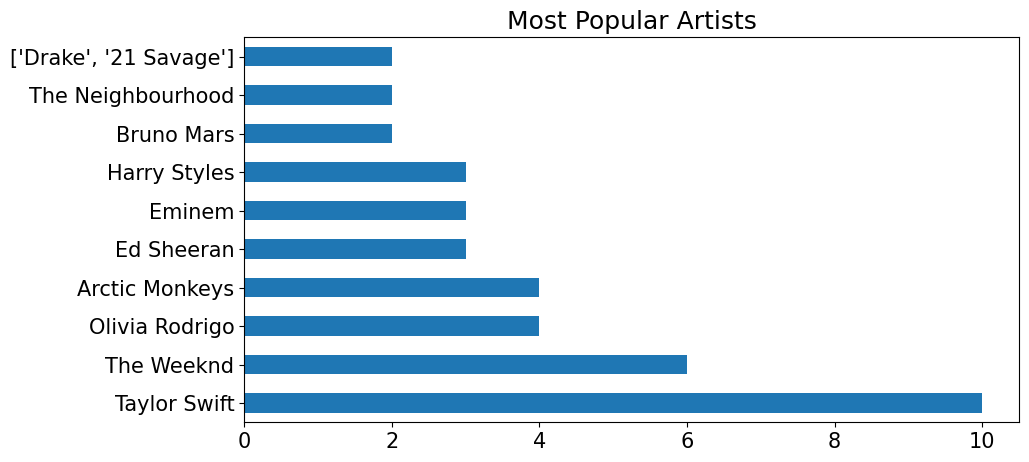

In [20]:
plt.figure(figsize=(10,5))
threshold = 85
df.loc[df['popularity']>threshold,'artists_name'].explode().value_counts().sort_values(ascending=False).head(10).plot.barh()
plt.title('Most Popular Artists')
plt.show()

# Most Popular Artists over the Years

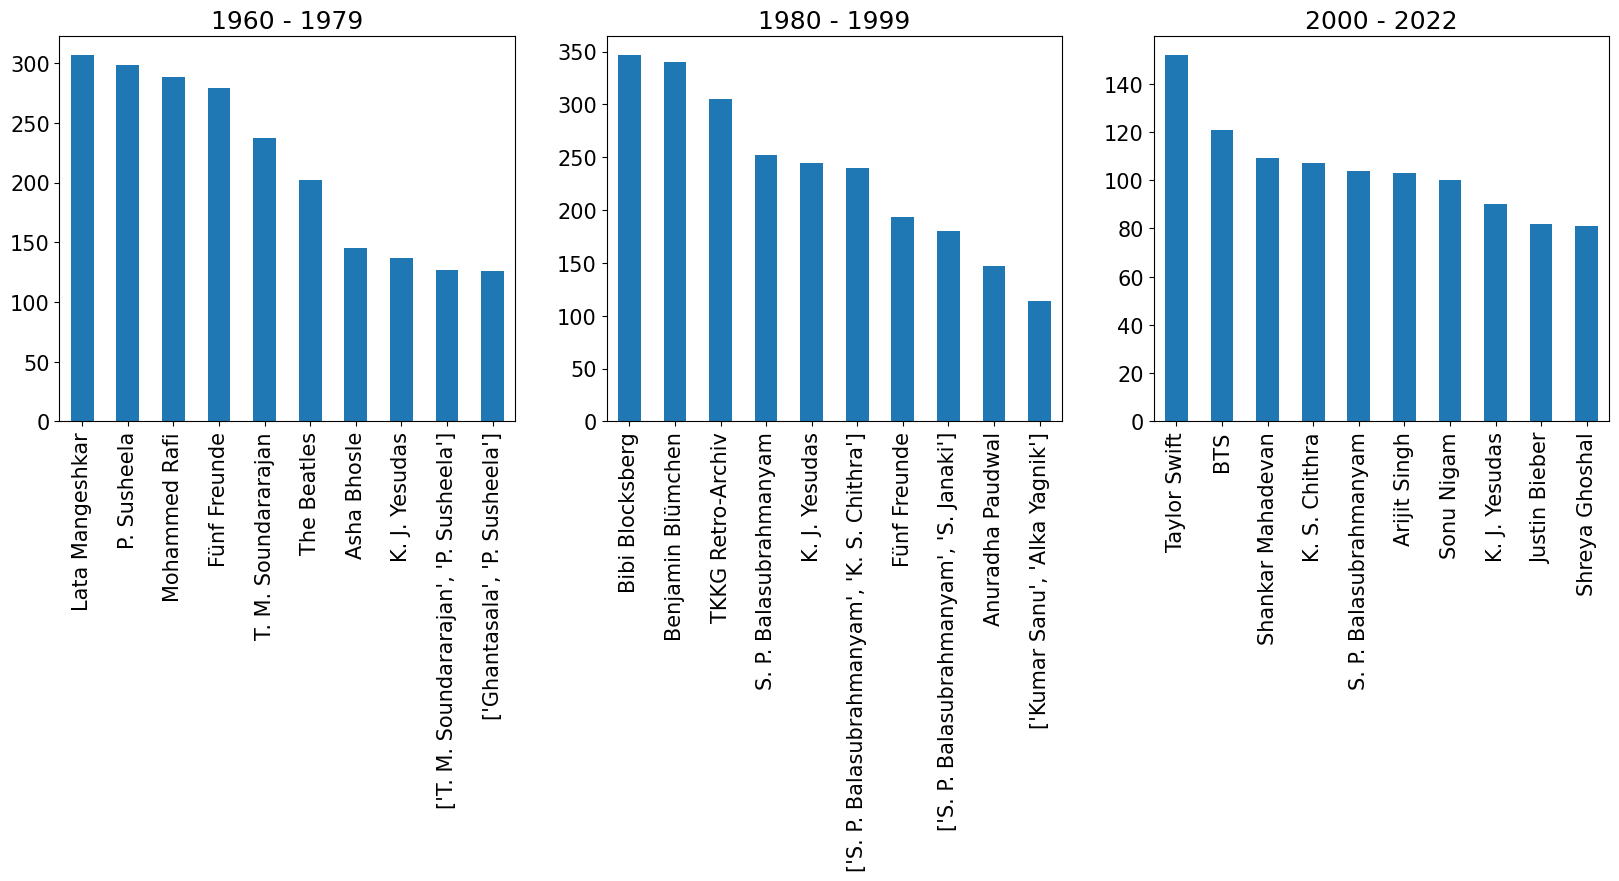

In [21]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

for idx, val in enumerate(df['years_window'].unique()):
    df.loc[(df['years_window']==val),'artists_name'].explode().value_counts().sort_values(ascending=False).head(10).plot.bar(ax=ax[idx])
    ax[idx].set_title(val)

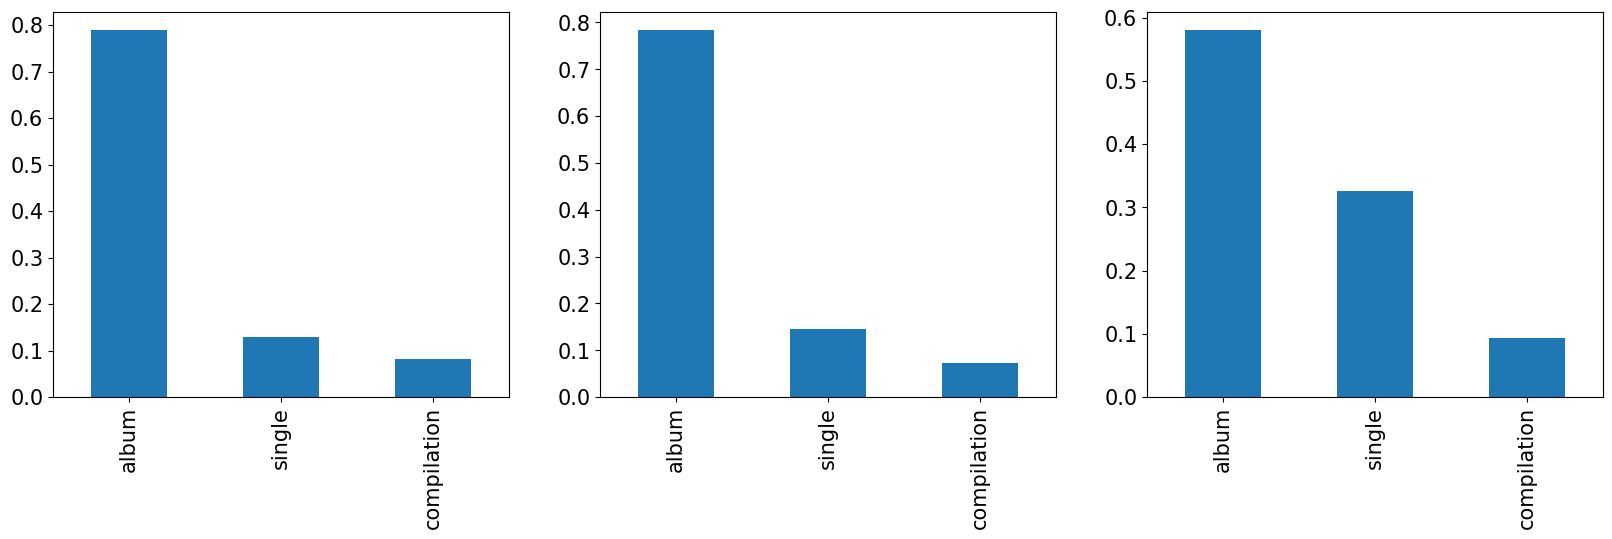

In [22]:
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
for idx, val in enumerate(df['years_window'].unique()):
    (df.loc[(df['years_window']==val),'album_type'].value_counts()/(len(df[(df['years_window']==val)]))).plot.bar(ax=axes[idx])

In [33]:
audio_feat_cols
scaler = StandardScaler()
X = scaler.fit_transform(df[audio_feat_cols])

In [57]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

for n in range(1, 12):
    
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X)

    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': audio_feat_cols,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

model       var
n                                 
1    PCA(n_components=1)  0.241241
2    PCA(n_components=2)  0.363026
3    PCA(n_components=3)  0.466735
4    PCA(n_components=4)  0.568626
5    PCA(n_components=5)  0.658251
6    PCA(n_components=6)  0.740698
7    PCA(n_components=7)  0.820372
8    PCA(n_components=8)  0.895678
9    PCA(n_components=9)  0.947119
10  PCA(n_components=10)  0.984696
11  PCA(n_components=11)       1.0

In [58]:
feature_weight_list[7]

n          features    values
0   8      danceability  0.076517
1   8            energy  0.063085
2   8               key  0.109905
3   8          loudness  0.071085
4   8              mode  0.106787
5   8       speechiness  0.085790
6   8      acousticness  0.074582
7   8  instrumentalness  0.105367
8   8          liveness  0.085323
9   8           valence  0.107376
10  8             tempo  0.114184

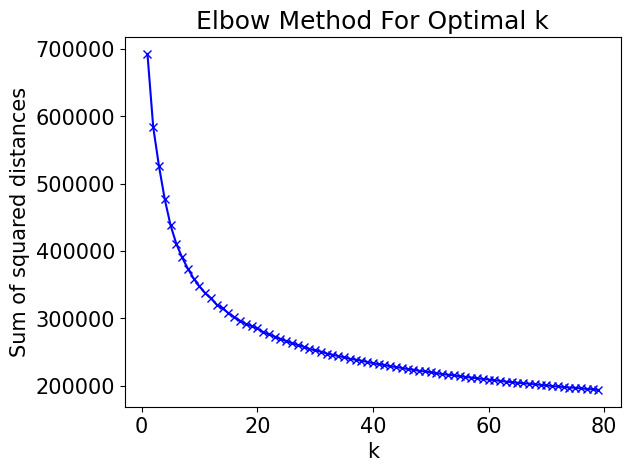

In [25]:
ss_dist = []
K = range(1, 80)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [26]:
km = KMeans(n_clusters=40, init='k-means++', random_state=123)
km = km.fit(X)

In [34]:
X = pd.DataFrame(X,columns=audio_feat_cols)
X['KMeans'] = km.predict(X.values)
X

danceability    energy       key  loudness      mode  speechiness  \
0         -1.930098 -1.011028 -0.084243  0.198762  0.748866    -0.423676   
1         -0.339472 -1.323124  0.493045  0.572373  0.748866    -0.426145   
2         -1.147510 -0.038024 -1.527463  0.462190  0.748866     0.173125   
3         -0.784847 -0.827442 -1.238819 -1.880520  0.748866    -0.323695   
4         -0.224946 -1.323124 -0.950175 -1.327200  0.748866    -0.378006   
...             ...       ...       ...       ...       ...          ...   
62978      0.150441 -0.735650 -0.084243  0.065724  0.748866    -0.417504   
62979      0.583092  0.939570 -1.527463  0.923371  0.748866     0.339760   
62980      0.697617  0.976288 -1.238819  1.118957  0.748866    -0.277407   
62981      2.078280  0.912033  1.070333  1.815901  0.748866     0.827322   
62982      0.735792  0.957929  0.204401  1.273887 -1.335352     1.641983   

       acousticness  instrumentalness  liveness   valence     tempo  KMeans  
0          0.196332         -0.246419  0.673592 -1.182903 -1.012289       9  
1          1.283814         -0.315916 -0.396158 -0.350438 -0.666239       9  
2          1.280724         -0.315901  2.188131  0.376385  1.816007      15  
3          1.345602         -0.310377 -0.753116  0.270742 -0.167618       2  
4          1.534058          2.756576 -0.570696  0.435545 -0.051470      13  
...             ...               ...       ...       ...       ...     ...  
62978     -0.220742         -0.315916 -0.593217 -0.654689  1.093959      22  
62979     -1.376191         -0.315916 -0.570696 -0.975843 -0.793314      19  
62980     -1.382061         -0.315916 -0.781830  0.338353 -0.689071      21  
62981     -1.352403         -0.315868 -0.801536  0.203131 -0.993437       0  
62982     -1.020906         -0.315916  0.797457 -0.637786 -0.751698      32  

[62983 rows x 12 columns]

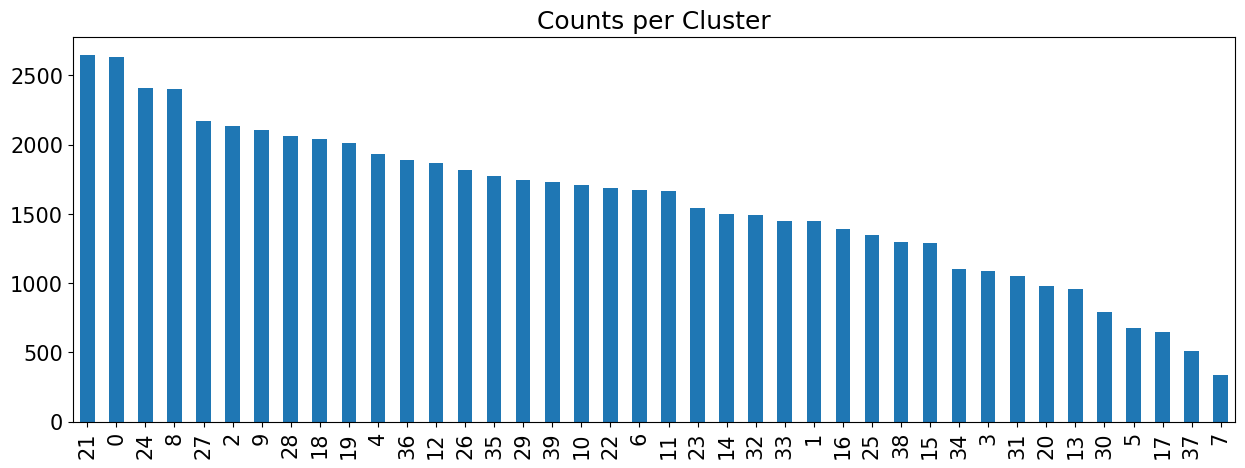

In [39]:
X['KMeans'].value_counts().plot(kind='bar',figsize=(15,5))
plt.title('Counts per Cluster')
plt.show()

In [232]:
from sklearn.mixture import GaussianMixture

gaussian_model = GaussianMixture(n_components=6)

X['GaussianMixture'] = gaussian_model.fit_predict(X[audio_feat_cols].values)

In [61]:
X.insert(11,'popularity',df['popularity'])

In [62]:
X.groupby(['GaussianMixture'])['popularity'].agg(['mean','max','min'])

mean  max  min
GaussianMixture                     
0                32.463636   89    0
1                34.965607   92    0
2                37.116226   92    0
3                40.161176   97    0
4                27.972696   81    6
5                38.897995  100    0

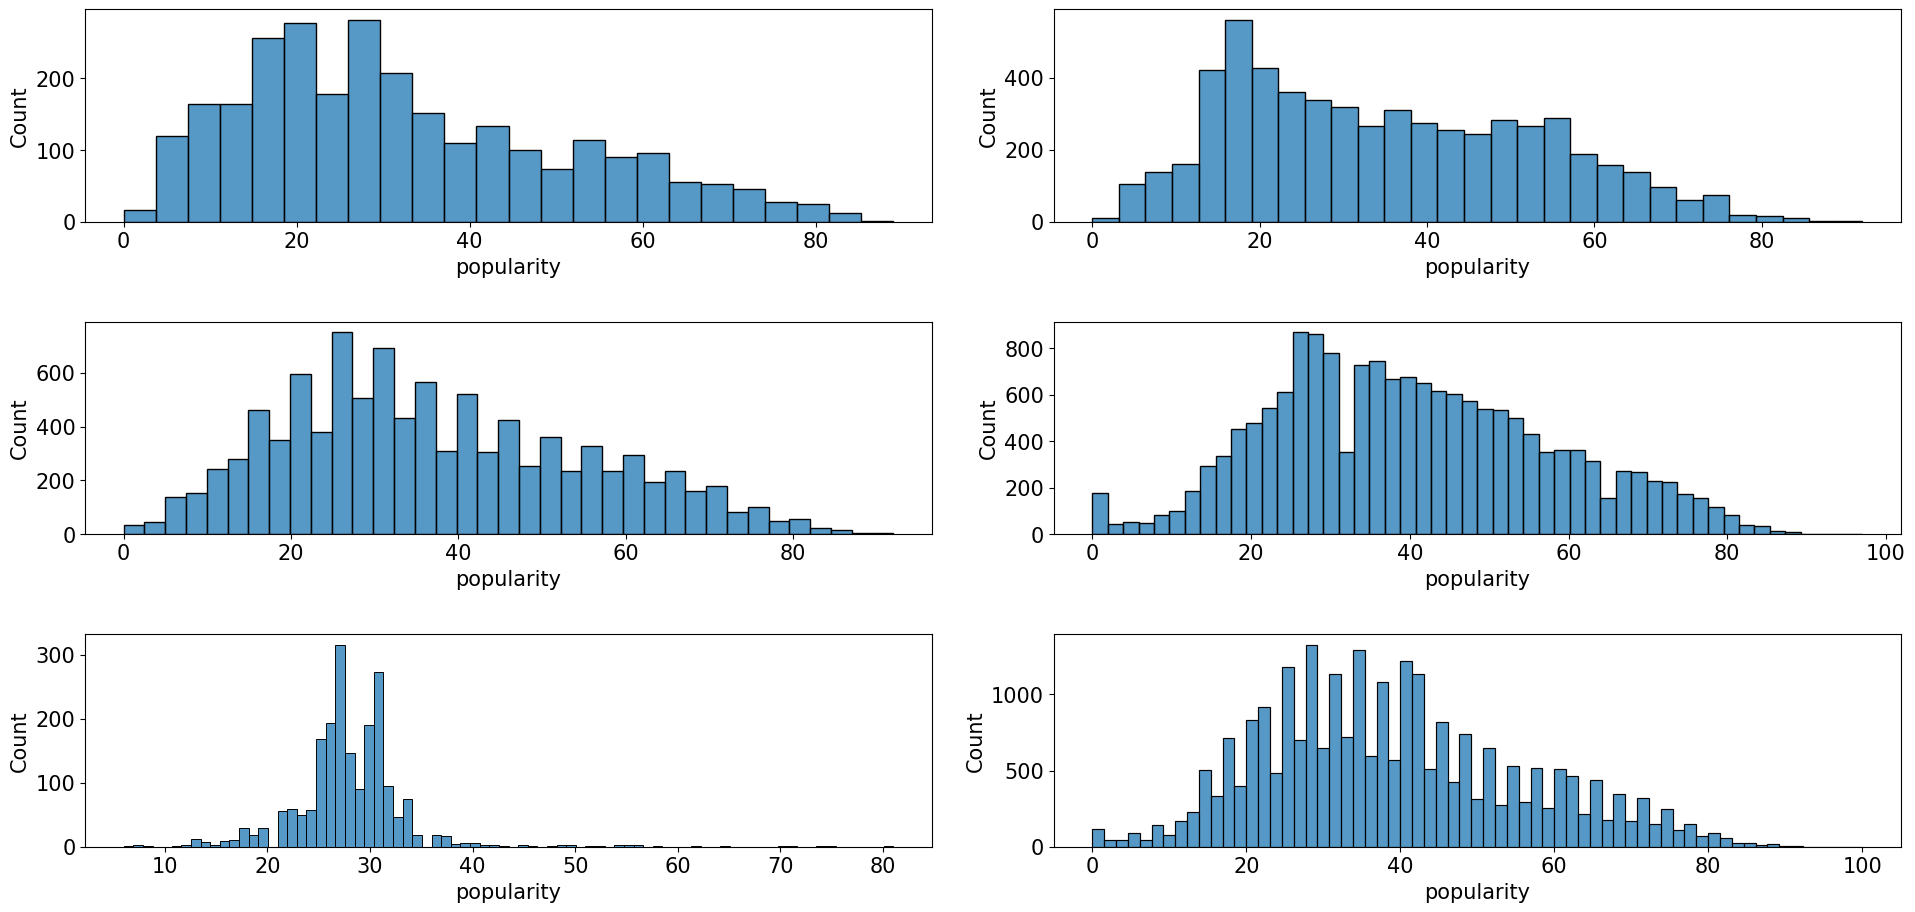

In [64]:
fig, axes = plt.subplots(3,2, figsize=(20,10))

fig.tight_layout(pad=3)

for i, ax in enumerate(axes.ravel()):
    sns.histplot(data=X[X['GaussianMixture']==i],x='popularity',ax=ax).set(title=i + ' Cluster')

In [126]:
feat_cols_ohe = ['key','mode']
feat_cols_float = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

X = df[feat_cols_float]

minMaxScaler = MinMaxScaler()
X = pd.DataFrame(minMaxScaler.fit_transform(X),columns=feat_cols_float)

In [127]:
X[feat_cols_ohe] = df[feat_cols_ohe].astype(int)
X['name'] = df['name']

In [128]:
X['polarity'] = X['name'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [129]:
X['subjectivity'] = X['name'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [131]:
X.drop(columns=['name'],inplace=True)

In [132]:
X['polarity'] = X['polarity'].apply(lambda x: 'Negative' if x<0 else ('Positive' if x>0 else 'Neutral'))
X['subjectivity'] = X['subjectivity'].apply(lambda x: 'Low' if x<1/3 else ('High' if x>1/3 else 'Medium'))

In [133]:
X = pd.get_dummies(X,columns=['key','mode','polarity','subjectivity'],drop_first=True)
X

danceability    energy  loudness  speechiness  acousticness  \
0          0.277890  0.348336  0.741753     0.030269      0.549197   
1          0.531440  0.280266  0.771214     0.029855      0.902610   
2          0.402637  0.560552  0.762525     0.130165      0.901606   
3          0.460446  0.388376  0.577789     0.047004      0.922691   
4          0.549696  0.280266  0.621422     0.037913      0.983936   
...             ...       ...       ...          ...           ...   
62978      0.609533  0.408397  0.731262     0.031302      0.413655   
62979      0.678499  0.773769  0.798892     0.158058      0.038153   
62980      0.696755  0.781778  0.814315     0.054752      0.036245   
62981      0.916836  0.767763  0.869273     0.239669      0.045884   
62982      0.702840  0.777773  0.826532     0.376033      0.153614   

       instrumentalness  liveness   valence     tempo  key_1  ...  key_7  \
0              0.013300  0.334334  0.329980  0.359244      0  ...      0   
1              0.000000  0.144144  0.528169  0.401406      0  ...      1   
2              0.000003  0.603604  0.701207  0.703836      0  ...      0   
3              0.001060  0.080681  0.676056  0.462157      1  ...      0   
4              0.588000  0.113113  0.715292  0.476308      0  ...      0   
...                 ...       ...       ...       ...    ...  ...    ...   
62978          0.000000  0.109109  0.455734  0.615864      0  ...      0   
62979          0.000000  0.113113  0.379276  0.385924      0  ...      0   
62980          0.000000  0.075576  0.692153  0.398624      1  ...      0   
62981          0.000009  0.072072  0.659960  0.361541      0  ...      0   
62982          0.000000  0.356356  0.459759  0.390994      0  ...      0   

       key_8  key_9  key_10  key_11  mode_1  polarity_Neutral  \
0          0      0       0       0       1                 1   
1          0      0       0       0       1                 1   
2          0      0       0       0       1                 1   
3          0      0       0       0       1                 1   
4          0      0       0       0       1                 1   
...      ...    ...     ...     ...     ...               ...   
62978      0      0       0       0       1                 1   
62979      0      0       0       0       1                 1   
62980      0      0       0       0       1                 0   
62981      0      1       0       0       1                 1   
62982      0      0       0       0       0                 1   

       polarity_Positive  subjectivity_Low  subjectivity_Medium  
0                      0                 1                    0  
1                      0                 1                    0  
2                      0                 1                    0  
3                      0                 1                    0  
4                      0                 1                    0  
...                  ...               ...                  ...  
62978                  0                 1                    0  
62979                  0                 1                    0  
62980                  1                 0                    0  
62981                  0                 1                    0  
62982                  0                 1                    0  

[62983 rows x 25 columns]

In [134]:
feat_cols = X.columns
feat_cols

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'mode_1', 'polarity_Neutral', 'polarity_Positive',
       'subjectivity_Low', 'subjectivity_Medium'],
      dtype='object')

In [136]:
X[['id','name']] = df[['id','name']]

# Recommendation Engine

In [235]:
playlist = []
for i in sp.playlist('6Rc8Kf2qO4Qdri0zpLVueH')['tracks']['items']:
    playlist.append(i['track'])

In [236]:
playlist = pd.DataFrame(playlist)
playlist = playlist.merge(pd.DataFrame(sp.audio_features(playlist['id'])),on='id',how='left')

In [237]:
playlist[feat_cols_float] = minMaxScaler.fit_transform(playlist[feat_cols_float])

In [238]:
playlist['polarity'] = playlist['name'].apply(lambda x: TextBlob(x).sentiment.polarity)
playlist['subjectivity'] = playlist['name'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
playlist['polarity'] = playlist['polarity'].apply(lambda x: 'Negative' if x<0 else ('Positive' if x>0 else 'Neutral'))
playlist['subjectivity'] = playlist['subjectivity'].apply(lambda x: 'Low' if x<1/3 else ('High' if x>1/3 else 'Medium'))

In [239]:
playlist = pd.get_dummies(playlist,columns=['key','mode','polarity','subjectivity'],drop_first=True)

In [240]:
playlist_X = pd.DataFrame(columns=feat_cols)
playlist_X

Empty DataFrame
Columns: [danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, key_1, key_2, key_3, key_4, key_5, key_6, key_7, key_8, key_9, key_10, key_11, mode_1, polarity_Neutral, polarity_Positive, subjectivity_Low, subjectivity_Medium]
Index: []

[0 rows x 25 columns]

In [241]:
playlist_X[feat_cols_float] = playlist[feat_cols_float]

In [242]:
for i in ['key','mode','polarity','subjectivity']:
    playlist_X[playlist_X.columns[playlist_X.columns.str.contains(i)]] = 0
    playlist_X[playlist.columns[playlist.columns.str.contains(i)]] = playlist[playlist.columns[playlist.columns.str.contains(i)]]

In [243]:
playlist_X[['id','name']]= playlist[['id','name']]

In [244]:
playlist_X

danceability    energy  loudness  speechiness  acousticness  \
0      0.328488  0.497596  0.252431     0.000000      0.000000   
1      0.171512  0.540865  0.249622     0.097902      0.228139   
2      0.212209  0.581731  1.000000     0.041958      0.204749   
3      1.000000  0.750000  0.706289     1.000000      0.062406   
4      0.502907  0.850962  0.607089     0.158841      0.000601   
5      0.651163  1.000000  0.625459     0.092907      0.011171   
6      0.148256  0.000000  0.000000     0.061938      0.866344   
7      0.000000  0.161058  0.065269     0.040959      1.000000   

   instrumentalness  liveness   valence     tempo  key_1  ...  key_9  key_10  \
0          0.014701  0.524590  0.000000  0.448789      0  ...      0       0   
1          0.000052  1.000000  0.358166  0.001140      0  ...      0       0   
2          0.001866  0.770492  0.381089  0.000000      0  ...      0       0   
3          0.000000  0.000000  0.722063  0.448520      0  ...      0       1   
4          1.000000  0.270492  0.180516  1.000000      0  ...      0       0   
5          0.000000  0.258197  1.000000  0.193072      0  ...      0       0   
6          0.000000  0.290984  0.224928  0.588491      0  ...      0       0   
7          0.004784  0.086066  0.229226  0.588158      0  ...      0       0   

   key_11  mode_1  polarity_Neutral  polarity_Positive  subjectivity_Low  \
0       0       1                 0                  1                 0   
1       0       0                 0                  0                 1   
2       0       1                 0                  0                 1   
3       0       0                 0                  0                 1   
4       0       1                 0                  0                 1   
5       0       1                 0                  0                 1   
6       0       1                 0                  0                 1   
7       0       1                 0                  0                 1   

   subjectivity_Medium                      id                  name  
0                    0  0FDzzruyVECATHXKHFs9eJ   A Sky Full of Stars  
1                    0  3RiPr603aXAoi4GHyXx0uy  Hymn for the Weekend  
2                    0  5qaEfEh1AtSdrdrByCP7qR                Demons  
3                    0  0pqnGHJpmpxLKifKRmU6WP              Believer  
4                    0  1zB4vmk8tFRmM9UULNzbLB               Thunder  
5                    0  7MXlTgQeo3IVlMpLnZuhxc             It's Time  
6                    0  1smFN2CLqGROu0J0UyvDfL                Shayad  
7                    0  2L2YNB3YIletW4fUtwphDv      Shayad - Reprise  

[8 rows x 27 columns]

In [245]:
playlist_X.set_index('id',inplace=True,drop=False)
X.set_index('id',inplace=True,drop=False)

In [246]:
def recommendations(tracks,playlist):
    
    playlist_feat = tracks.loc[tracks['id'].isin(playlist['id'].values),:][feat_cols]
    playlist_feat = pd.DataFrame(playlist_feat.sum(axis=0)).T
    
    non_playlist_feat = tracks.loc[~(tracks['id'].isin(playlist['id'].values)),['name',*feat_cols]]
    non_playlist_feat['similarity'] = cosine_similarity(non_playlist_feat[feat_cols].values,playlist_feat.values)
    
    return non_playlist_feat.sort_values('similarity',ascending=False).head(50)

In [247]:
recomm = recommendations(X,playlist_X)

In [248]:
recomm

name  danceability  \
id                                                                           
6EwNJz8CuVsrsLvXprJ20Q                         I Know Places      0.610548   
1zkC3XLyodSNGyiYXSNg8Y                   Okkasari Cheppaleva      0.696755   
3QqImhDBzvbGF5Ckj5VnT2                           Que Saudade      0.676471   
1FsR2mAMUgtpsDMfXJNyjf                   Chatiyan vs. Jigraa      0.604462   
2C6WXnmZ66tHhHlnvwePiK    Die For Me (feat. Future & Halsey)      0.622718   
5HJGzB7sZleFrrDvr0pRo4                          Sajh Dhaj Ke      0.718053   
4x7K1DHFEM3IxWX7CBVPhq                        Villadi Villan      0.621704   
2rcNjSwPQfFS8Sjj0RgdWP                              Appangal      0.704868   
5lfXUHfQF97EYDPQpDLue0         Mala Pirtichya Jhulyat Jhulwa      0.692698   
6D2LwdOQ5gjoFrpkoO5fvu                           Gundellonaa      0.697769   
21jGcNKet2qwijlDFuPiPb                               Circles      0.704868   
3xpjEMrSF5KdHneYqjgvWs                               Difícil      0.587221   
03VTytguq5MS6e3x03y5i1                     Sinbad The Sailor      0.600406   
0qto9LxY3Et1uJtVYyYvOB  Mala Ved Laagale (Swapnil Bandodkar)      0.649087   
3QY2b3Tc5sORFgkIgmPH6E                         O Jaane Jaana      0.604462   
0fYTkcBMtjtP4hzoOxGgSF                     Choosi Chudangane      0.644016   
0fFvA3D274uDVAy0nFWt9f                    Veyilodu Vilaiyadi      0.703854   
10eHq0shtqQxcBDggf0kxy                Pona Usuru Vanthurichu      0.583164   
0JsSCThbWcH5X2Zqu0BUSI                       Merry Christmas      0.602434   
34GqpgyTNxfKbi6BMNrB7z                       Merry Christmas      0.602434   
5LZrY4KXsH3YgzHYaYSvgT                       Merry Christmas      0.602434   
4qAteuJxOnJNYQ8ldHJwfp                       Merry Christmas      0.602434   
7v7VZMWM7inUFM95OYAoYW                       Merry Christmas      0.602434   
6CI3Kfe0xpeIjg3StvBdBX                       Merry Christmas      0.602434   
4m0q0xQ2BNl9SCAGKyfiGZ                         Somebody Else      0.626775   
4YpxBrMONvVqbmXmYI2P5M                      Meghaalu Lekunna      0.746450   
3twcMeuK3k5H5yTFZOH5I0                          Keno Aaj Kal      0.533469   
6VoiY3rukFPoqzP4AoGPU8   The Invisible Man - Remastered 2011      0.713996   
1SNgyumKA0trB8ceWRAETN                 Can I Have This Dance      0.563895   
7CzbFj6OAprAuVSufJEaIF                          Kallil Aadum      0.740365   
1nhuodhwf92WrDOWy95XNz                        Pyar Da Saboot      0.699797   
0ZdUHFxifUJNqo7G4aJzoF                              Savannah      0.662272   
17eVe466nbOmrqyaBHh8BI                               Frelsið      0.608519   
70OzwqFfeL0Mb3A9MUmA4R        Saavar Re Mana - From "Mitwaa"      0.685598   
1cyECXirsoofBBFIIXorj6                        Saavar Re Mana      0.685598   
6XWQQoeqyHcQ0NlXt0iVDM                          Chella Kutti      0.700811   
6xSsrWJJsfJTbdnV0bKpPW                      Refém Do Coração      0.580122   
1NwzPMsEVJx8jdvp7eNVsy                           Jhiri Jhiri      0.652130   
2hCLTvRbYq0VrEx1S2AI8A                         Pé Na Estrada      0.706897   
1Ryxsiacu8pUXIMCVnIQ8J                        Still The Same      0.719067   
05FlPO0eMYMfy9PAb1rVIE                    Azhage Bhramanidam      0.626775   
1tZrspn1lncPkr3nkoKbVk                               Chilaka      0.734280   
3Zg3BTdNbWZtIeqppdOYDe                       Dil Se Mat Khel      0.695740   
0FZqQnhWSf0xJsiu51KXDq                      Oke Oka Oorilona      0.660243   
4ZHcMX5r5tlv6e1fxGfo66                                  Solo      0.717039   
7fec0UcxeHVe6kHIez2GSs                Orasaadha - Madras Gig      0.595335   
62wnQra2VgCUyHO3BUIAcr                       Jannatein Kahan      0.552738   
6t9PSgWDhsWUPHXwcN6nob                             Chitta Ve      0.814402   
6OnA0y7dYaNrGvk7xVUkSN                             Om Namami      0.709939   
16ojpT7Gv6sDWxiTTGjula                              Des Mera      0.759635   
